# Import libary

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesing data

## check all Data

In [3]:
data = pd.read_csv('D:\\Project\\bigdata\\archive\\weatherHistory.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='raise', utc=True)
data["Formatted Date"] = data["Formatted Date"].dt.date

In [6]:
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Check String columns

In [7]:
str_col = [col for col in data.columns if data[col].dtype == 'object']
str_data = data[str_col]
str_data.head(5)

,Formatted Date,Summary,Precip Type,Daily Summary
0,2006-03-31,Partly Cloudy,rain,Partly cloudy throughout the day.
1,2006-03-31,Partly Cloudy,rain,Partly cloudy throughout the day.
2,2006-04-01,Mostly Cloudy,rain,Partly cloudy throughout the day.
3,2006-04-01,Partly Cloudy,rain,Partly cloudy throughout the day.
4,2006-04-01,Mostly Cloudy,rain,Partly cloudy throughout the day.


In [8]:
str_data['Daily Summary'].value_counts()

Daily Summary
Mostly cloudy throughout the day.                                                 20085
Partly cloudy throughout the day.                                                  9981
Partly cloudy until night.                                                         6169
Partly cloudy starting in the morning.                                             5184
Foggy in the morning.                                                              4201
                                                                                  ...  
Drizzle until morning.                                                               24
Light rain overnight.                                                                24
Rain until morning.                                                                  24
Rain until afternoon.                                                                24
Foggy starting overnight continuing until morning and breezy in the afternoon.       23
Name: count, Lengt

In [9]:
str_data['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [10]:
str_data['Summary'].value_counts()

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

## Check Numbers columns

In [11]:
num_col = [col for col in data.columns if data[col].dtype == 'float64']
num_data = data[num_col]
num_data .head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [12]:
num_data['Loud Cover'].value_counts()

Loud Cover
0.0    96453
Name: count, dtype: int64

## Drop unimportant value 

In [13]:
data.drop(columns= ['Loud Cover','Daily Summary'],inplace= True)

## Group by data

In [14]:
str_col = [col for col in data.columns if data[col].dtype == 'object' and col != 'Formatted Date']
num_col = [col for col in data.columns if data[col].dtype == 'float64']
agg_funcs = {col: "mean" for col in num_col}
agg_funcs.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in str_col})
data = data.groupby("Formatted Date").agg(agg_funcs).reset_index()
data

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Precip Type
0,2005-12-31,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000,Partly Cloudy,rain
1,2006-01-01,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,1011.985000,Mostly Cloudy,rain
2,2006-01-02,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,1010.384167,Overcast,rain
3,2006-01-03,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,1021.170833,Overcast,rain
4,2006-01-04,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,981.770833,Overcast,rain
...,...,...,...,...,...,...,...,...,...,...
4014,2016-12-27,0.278009,-3.160417,0.890000,10.979529,185.875000,7.303362,1020.305833,Mostly Cloudy,rain
4015,2016-12-28,0.222222,-3.225926,0.890000,10.968125,186.083333,7.304704,1020.335833,Mostly Cloudy,snow
4016,2016-12-29,0.167824,-3.265509,0.889583,10.876892,186.041667,7.310071,1020.367083,Mostly Cloudy,snow
4017,2016-12-30,0.117593,-3.309259,0.889167,10.810479,186.000000,7.316779,1020.396250,Mostly Cloudy,snow


## label encode

In [15]:
pt_le = LabelEncoder()
data['Precip Type']= pt_le.fit_transform(data['Precip Type'])
data

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Precip Type
0,2005-12-31,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000,Partly Cloudy,0
1,2006-01-01,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,1011.985000,Mostly Cloudy,0
2,2006-01-02,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,1010.384167,Overcast,0
3,2006-01-03,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,1021.170833,Overcast,0
4,2006-01-04,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,981.770833,Overcast,0
...,...,...,...,...,...,...,...,...,...,...
4014,2016-12-27,0.278009,-3.160417,0.890000,10.979529,185.875000,7.303362,1020.305833,Mostly Cloudy,0
4015,2016-12-28,0.222222,-3.225926,0.890000,10.968125,186.083333,7.304704,1020.335833,Mostly Cloudy,1
4016,2016-12-29,0.167824,-3.265509,0.889583,10.876892,186.041667,7.310071,1020.367083,Mostly Cloudy,1
4017,2016-12-30,0.117593,-3.309259,0.889167,10.810479,186.000000,7.316779,1020.396250,Mostly Cloudy,1


In [16]:
sum_le = LabelEncoder()
data['Summary']= pt_le.fit_transform(data['Summary'])
data

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Precip Type
0,2005-12-31,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,1016.660000,11,0
1,2006-01-01,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,1011.985000,9,0
2,2006-01-02,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,1010.384167,10,0
3,2006-01-03,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,1021.170833,10,0
4,2006-01-04,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,981.770833,10,0
...,...,...,...,...,...,...,...,...,...,...
4014,2016-12-27,0.278009,-3.160417,0.890000,10.979529,185.875000,7.303362,1020.305833,9,0
4015,2016-12-28,0.222222,-3.225926,0.890000,10.968125,186.083333,7.304704,1020.335833,9,1
4016,2016-12-29,0.167824,-3.265509,0.889583,10.876892,186.041667,7.310071,1020.367083,9,1
4017,2016-12-30,0.117593,-3.309259,0.889167,10.810479,186.000000,7.316779,1020.396250,9,1


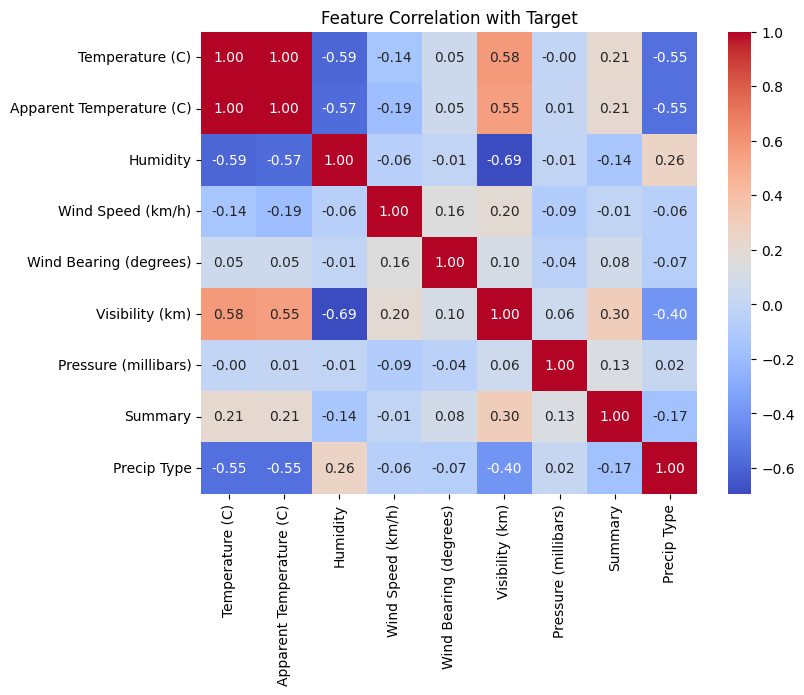

In [17]:
df = data[[col for col in data.columns if col != 'Formatted Date' ]]
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Feature Correlation with Target")
plt.show()

In [18]:
data.drop(columns=['Wind Bearing (degrees)','Wind Speed (km/h)','Pressure (millibars)','Humidity'], inplace= True)

In [23]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
test= data.loc[data['Formatted Date'] > pd.to_datetime('2016-01-01')]
train = data.loc[data['Formatted Date'] <= pd.to_datetime('2016-01-01')]

In [25]:
test.to_csv('./test.csv')
train.to_csv('./train.csv')

# Train model Machine Learning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

: 

## Model to predict summary from features daily

In [ ]:
test.drop(columns='Formatted Date', inplace=True)
Predict_Summary = Pipeline([
    ('scaler', StandardScaler()),
    
])